In [ ]:
#Plotting the map of America showing distribution of gun violence incidents around the country from Jan 2018 to March 2018
import pandas as pd
import folium

# Step 1: Load your data
file_path = 'datatoanalyse.xlsx'  # Path to your CSV file
df = pd.read_excel(file_path)

# Step 2: Clean the data by dropping rows with NaN values in 'latitude' or 'longitude'
df = df.dropna(subset=['latitude', 'longitude'])

# Step 3: Create a base map
# Initialize the map centered around the United States
us_map = folium.Map(location=[37.1, -95.7], zoom_start=5)

# Step 4: Add points to the map
for index, row in df.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=5,  # Size of the marker
        color='red',  # Color of the marker
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup=f'Incident ID: {row["incident_id"]}'  # Popup to show incident ID
    ).add_to(us_map)

# Step 5: Save the map to an HTML file
output_file_path = 'gun_violence_map.html'
us_map.save(output_file_path)

print(f'Map has been created and saved as {output_file_path}.')

Map has been created and saved as gun_violence_map.html.


In [29]:
#Getting the average number of incidents per state
import pandas as pd

# Load the Excel file into a DataFrame
file_path = 'datatoanalyse.xlsx'  # Set your Excel file path
df = pd.read_excel(file_path, engine='openpyxl')  # Read the Excel file

# Ensure the
df['incident_date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract month and year
df['month_year'] = df['incident_date'].dt.to_period('M')  # This gives you year-month

# Group by state and month_year and count incidents
incident_counts = df.groupby(['state', 'month_year']).size().reset_index(name='incident_count')

# Calculate the average number of incidents per state
average_incidents_per_state = incident_counts.groupby('state')['incident_count'].mean().reset_index(name='average_incidents')

# Export the result to an Excel file
output_file_path = 'average_incidents_per_state.xlsx'
average_incidents_per_state.to_excel(output_file_path, index=False, engine='openpyxl')

print(f'Average incidents per state exported successfully to {output_file_path}')

Average incidents per state exported successfully to average_incidents_per_state.xlsx


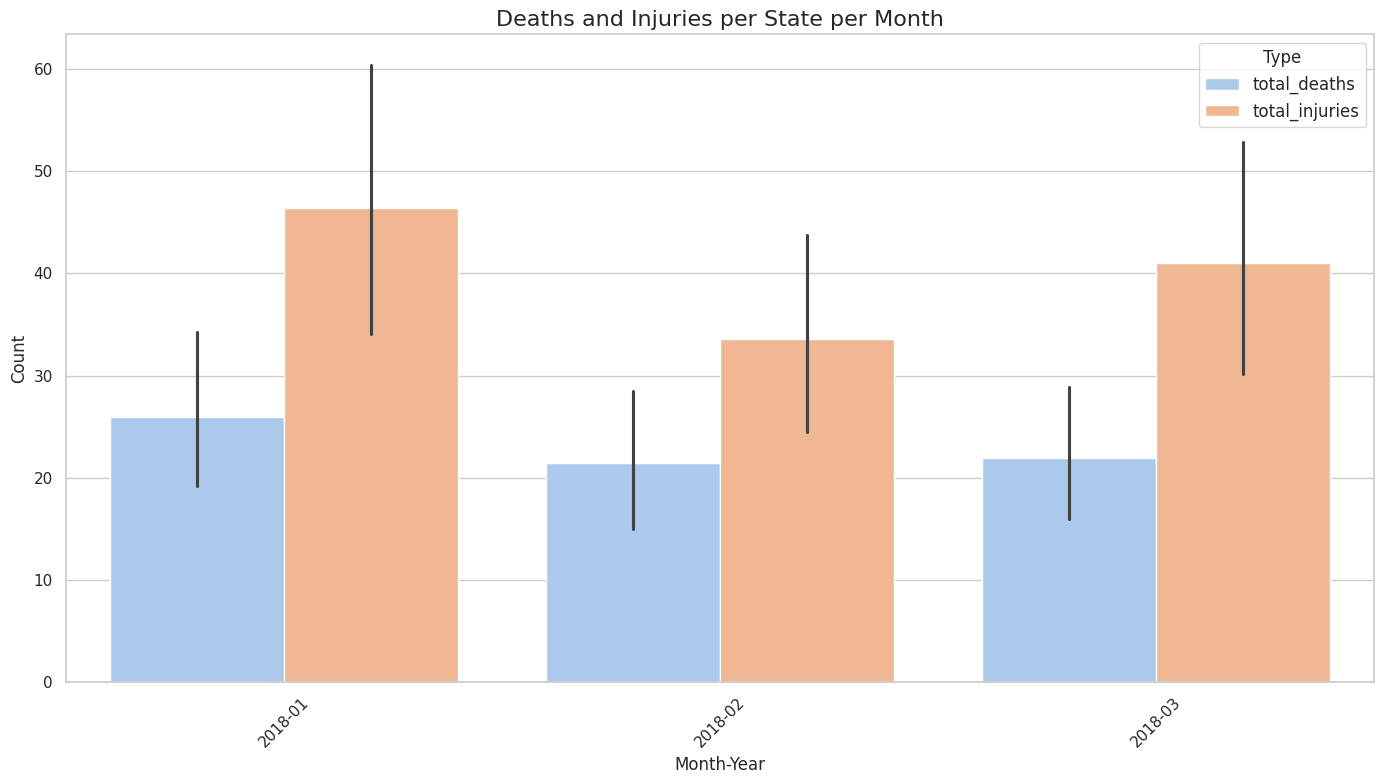

In [33]:
#Deaths and Injuries per state per Month
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file into a DataFrame
file_path = 'datatoanalyse.xlsx'  # Set your Excel file path
df = pd.read_excel(file_path, engine='openpyxl')  # Read the Excel file


df['incident_date'] = pd.to_datetime(df['date'], errors='coerce')


df['month_year'] = df['incident_date'].dt.to_period('M')


aggregated_data = df.groupby(['state', 'month_year']).agg(
    total_deaths=('n_killed', 'sum'),
    total_injuries=('n_injured', 'sum')
).reset_index()

# Melt the DataFrame for easier plotting with seaborn
melted_data = aggregated_data.melt(id_vars=['state', 'month_year'],
                                    value_vars=['total_deaths', 'total_injuries'],
                                    var_name='type',
                                    value_name='count')

# Set the plotting style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(data=melted_data, x='month_year', y='count', hue='type', palette='pastel')

# Improve the visualization
plt.title('Deaths and Injuries per State per Month', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Type', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

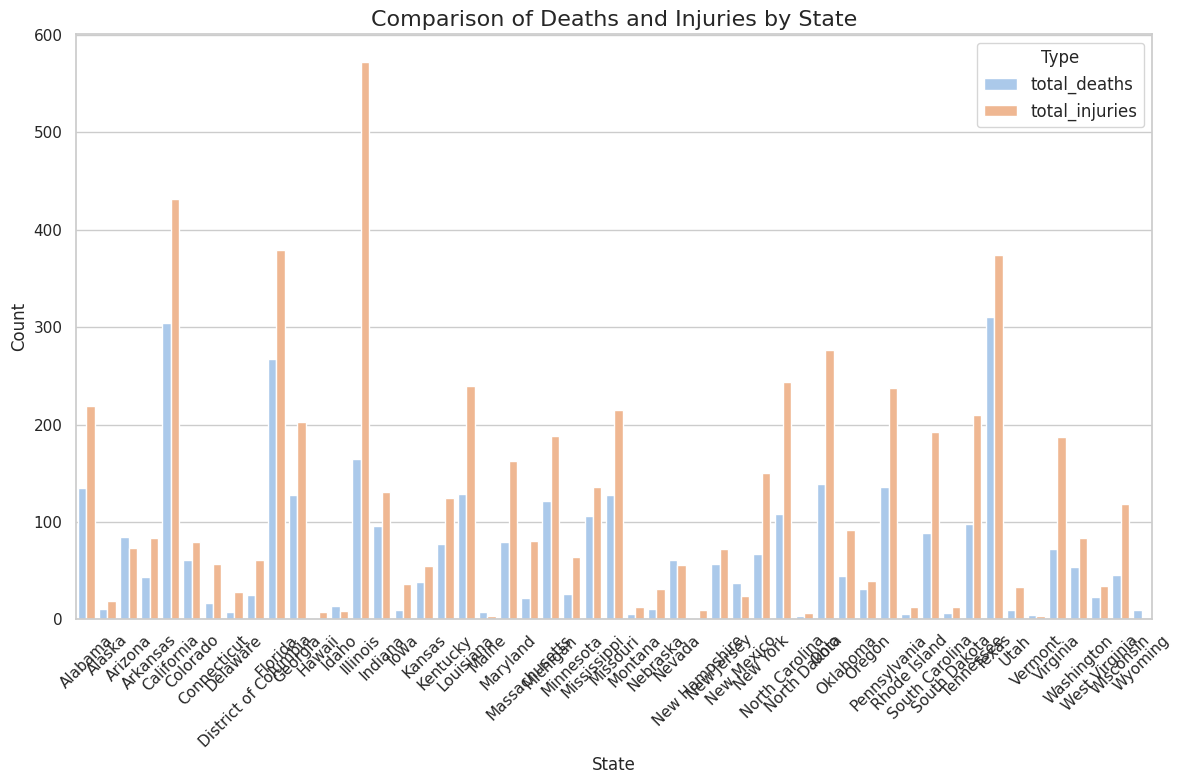

In [37]:
#compare Deaths and Injuries by state
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file into a DataFrame
file_path = 'datatoanalyse.xlsx'  # Set your Excel file path
df = pd.read_excel(file_path, engine='openpyxl')  # Read the Excel file


deaths_col = 'n_killed'
injuries_col = 'n_injured'

# Group by state to aggregate total deaths and injuries
comparison_data = df.groupby('state').agg(
    total_deaths=(deaths_col, 'sum'),
    total_injuries=(injuries_col, 'sum')
).reset_index()

# Melt the DataFrame for easier plotting
melted_comparison_data = comparison_data.melt(id_vars='state',
                                               value_vars=['total_deaths', 'total_injuries'],
                                               var_name='type',
                                               value_name='count')

# Set the plotting style
sns.set(style="whitegrid")

# Create a bar plot to compare deaths and injuries across states
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(data=melted_comparison_data, x='state', y='count', hue='type', palette='pastel')

# Improve the visualization
plt.title('Comparison of Deaths and Injuries by State', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('State', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Type', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()